<html>
<h1  align="center"> 
    <hr>
    <img align="center;" style="background-color:
#253bff"; color:"#ff5d25";" src="https://www.tensorflow.org/images/tf_logo_social.png?hl=es-419"; width="60%"; height="40%">

</h1>
</html>

<h3 align="center">Entrenando un modelo para predecir imagenes.
</h3>

<h1 align="center">Indice del analisis</h1>

- [**Librerias**](#Librerias)
- [**Modelo desde el Metodo**](#Modelo-desde-el-Metodo)
- [**Modelo Manual**](#Modelo-Manual)

<html><h1 align="center", style="background: #414ce8; color:white">Librerias</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

In [13]:
import tensorflow as tf
import network
import pprint

<html><h1 align="center", style="background: #414ce8; color:white">Modelo desde el Metodo</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

PROBAR para este caso:

Desea escalar los valores? (Si/No) Si

Ingrese la cantidad de Neuronas: 128

Ingrese la cantidad de Outputs:  10

Ingrese la cantidad de Capas Ocultas: (Maximo 3) 3

In [14]:
# Se instancia la clase Model

object = network.Model()

# Se almacenan los imputs para el modelo

valores = object._input()



Desea entrenar una Red Neuronal? (Si/No): 
 No


Muchas gracias



In [15]:
# Se entrena el modelo en base a los inputs
if valores != None:
    mnist = tf.keras.datasets.mnist.load_data()

    (x_train, y_train), (x_test, y_test) = mnist

    model = object._get_model(inputs = valores, data = mnist, epocas = 6)
    
    # Resultados

    pprint.pprint(model.history)
else:
    print('Ejecuar valores para obtener los inputs')

Ejecuar valores para obtener los inputs


In [16]:
# Graficos
try:
    if model.history != None:
        object._get_plots(model.history['loss'], y_label = 'loss')
        object._get_plots(model.history['accuracy'], y_label = 'accuracy')
    else:
        print('Ejecuar valores para obtener los inputs')
except Exception as e:
    print(e)

name 'model' is not defined


Se importa un conjunto de datos que consta de imagenes tamaño 28 x 28

<html><h1 align="center", style="background: #414ce8; color:white">Modelo Manual</h1></html>

[**Volver al Inicio**](#Indice-del-analisis)

In [17]:
mnist = tf.keras.datasets.mnist

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Ejemplo de uno de los tensores que se utilizara
para entrenar el modelo

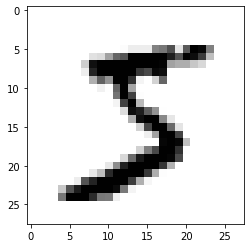

In [19]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

A continuacion se observan los arrays y sus respectivos valores de escala entre blanco y negro para las primeras 8 filas de 28

In [20]:
print('Tamaño: ',x_train[0].shape)
print('Tensor: ')
x_train[0][0:8]

Tamaño:  (28, 28)
Tensor: 


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Construccion del modelo

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

model = tf.keras.models.Sequential()
# Se adicionan dos capas ocultas
model.add(tf.keras.layers.Flatten())
# Se agregan 128 neuronas a la capa con una funcion de activacion llamada relu predeterminada de keras
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
# Se utiliza softmax para la funcion de activacion
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# Las redes neuronales siempre estan tratando de minimizar las perdidas

model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

# Utilizamos 3 epocas

historial = model.fit(x_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6713 - accuracy: 0.8702
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4112 - accuracy: 0.9186
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2770 - accuracy: 0.9340


In [22]:
historial.history

{'loss': [1.671308994293213, 0.41119107604026794, 0.2769627273082733],
 'accuracy': [0.8701833486557007, 0.918583333492279, 0.933983325958252]}

Podemos observar que a partir de la tercer iteración la perdida tiende a estabilizarse y el accuracy llega a un maximo en la sexta

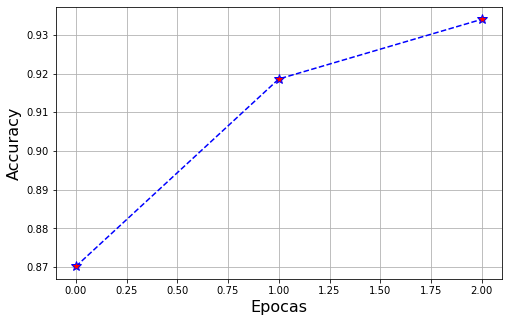

In [23]:
plt.figure(figsize = (8,5))
plt.plot(historial.history['accuracy'], color = 'blue', linestyle = 'dashed', marker = '*', markerfacecolor = 'red', markersize = 10)
plt.xlabel('Epocas', fontsize=16); plt.ylabel('Accuracy', fontsize=16)
plt.grid(); plt.show()

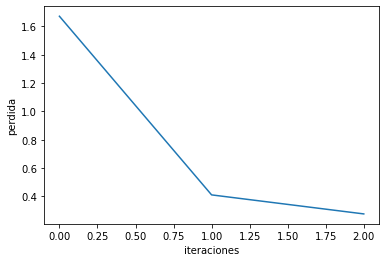

In [24]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss']);

In [25]:
prediccion = model.predict([x_test])

313/313 [==============================] - 0s 1ms/step


A simple vista se puede visualizar que el primer array es un 7

In [26]:
from termcolor import colored

longitud = x_train[0].shape[0]
x_test   = tf.keras.utils.normalize(x_test, axis = 1)
for i in range(longitud):
    array = x_test[0][i]
    array = [1 if  i > 0 else 0 for i in array]
    #print(' '.join(str(e) for e in array))
    print(' '.join(colored(e, 'red') if e == 1 else colored(e, 'blue') for e in array))

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 

Prediccion de la imagen

            Prediccion:  7


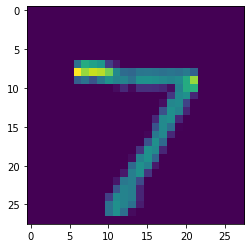

            Prediccion:  2


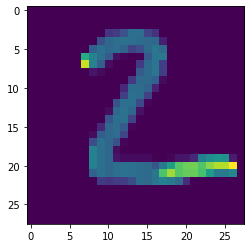

            Prediccion:  1


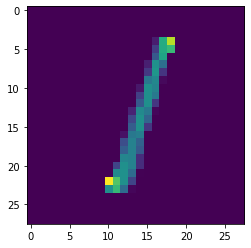

In [27]:
import numpy as np

for i in range(0, 3):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i])
    plt.show()

Con datos Escalados:

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

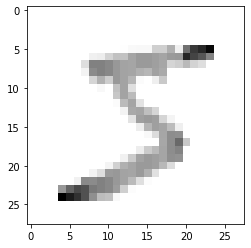

In [29]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [30]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


model.compile(optimizer = 'adam',
              loss      = 'sparse_categorical_crossentropy',
              metrics   = ['accuracy'])

historial = model.fit(x_train,
                  y_train,
                  epochs = 6)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2619 - accuracy: 0.9234
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1080 - accuracy: 0.9668
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0727 - accuracy: 0.9772
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0547 - accuracy: 0.9824
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0388 - accuracy: 0.9876
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0313 - accuracy: 0.9895
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0255 - accuracy: 0.9913
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0179 - accuracy: 0.9939
Epoch 10/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.016

Podemos observar que a partir de la iteracion numero 10 la perdida tiende a estabilizarse

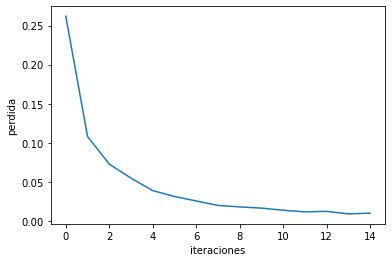

In [31]:
plt.xlabel('iteraciones')
plt.ylabel('perdida')
plt.plot(historial.history['loss']);

            Prediccion:  7


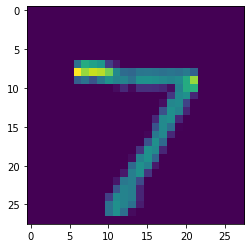

            Prediccion:  2


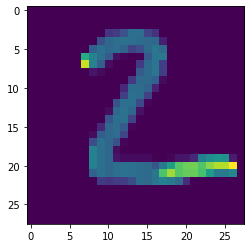

            Prediccion:  1


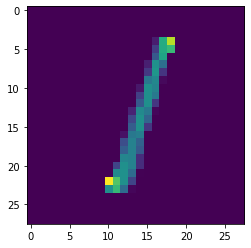

In [32]:
import numpy as np

for i in range(0, 3):
    # Argmax retorna el indice del numero mas grande en el array
    imagen = np.argmax(prediccion[i])
    print('            Prediccion: ',imagen)
    plt.imshow(x_test[i])
    plt.show()